In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df=pd.read_csv(r"C:\Users\HP\Desktop\week-17\titanic.csv")
df.shape

(891, 12)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Few conclusions

# 1. Missing values in Age, Cabin and Embarked columns
# 2. More than 70 percent values are missing in cabin columns, will have to drop
# 3. Few columns have inappropriate data types

In [13]:
# Dropping cabin column

df.drop(columns=['Cabin'],inplace=True)

In [14]:
# Imputing missing values for age
# Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
df['Embarked'].fillna('S', inplace=True)

In [17]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,S


In [18]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [19]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [20]:
#Changing data type for the following cols
#Survived(category)
#PClass(category)
#Sex(category)
#Age(int)
#Embarked(category)

In [21]:
df['Survived']=df['Survived'].astype('category')

In [22]:
df['Pclass']=df['Pclass'].astype('category')




In [23]:
df['Sex']=df['Sex'].astype('category')

In [24]:
df['Age']=df['Age'].astype('int')

In [25]:
df['Embarked']=df['Embarked'].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [27]:
# Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 62% people died in the accident


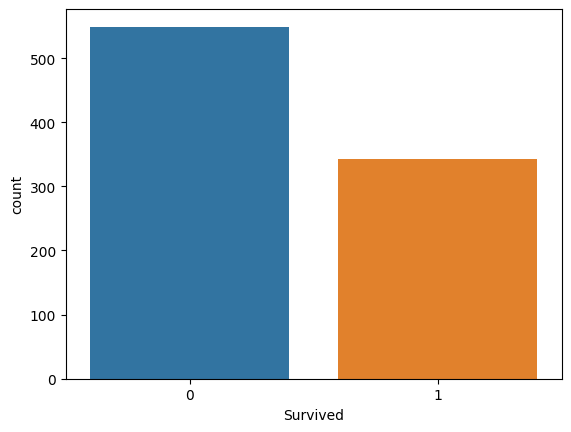

In [40]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(x='Survived', data=df)


death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {}% people died in the accident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

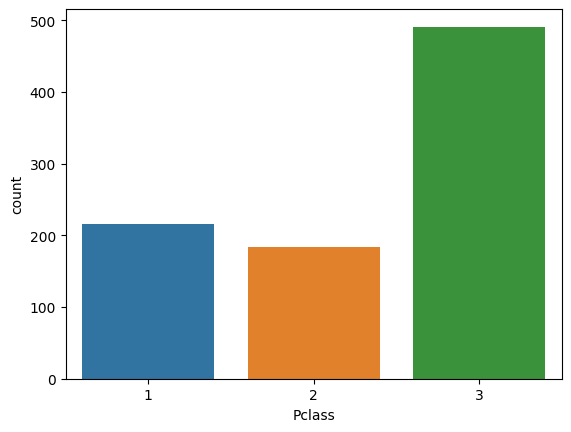

In [42]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(x='Pclass', data=df)

# Conclusion : Pclass was the most crowded class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

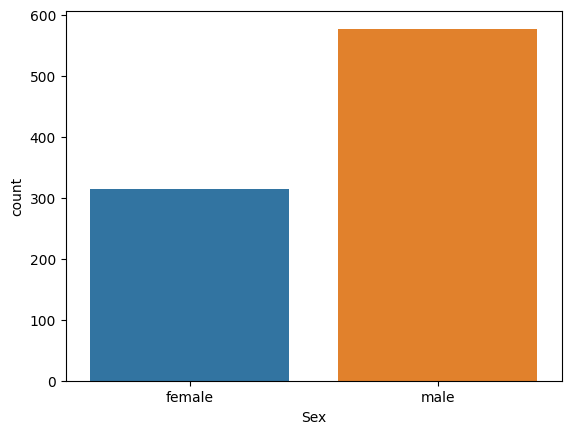

In [43]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(x='Sex',data=df)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

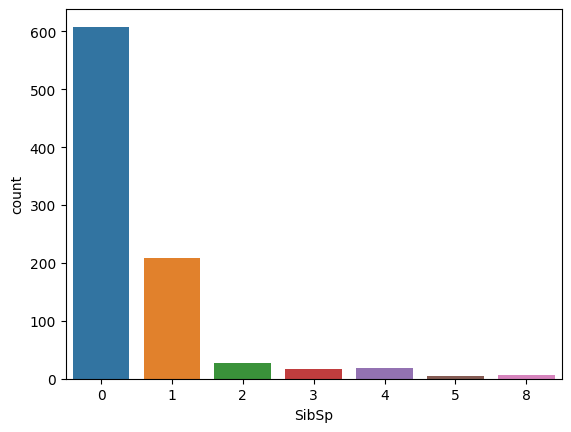

In [45]:
print(df['SibSp'].value_counts())

sns.countplot(x='SibSp',data=df)

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

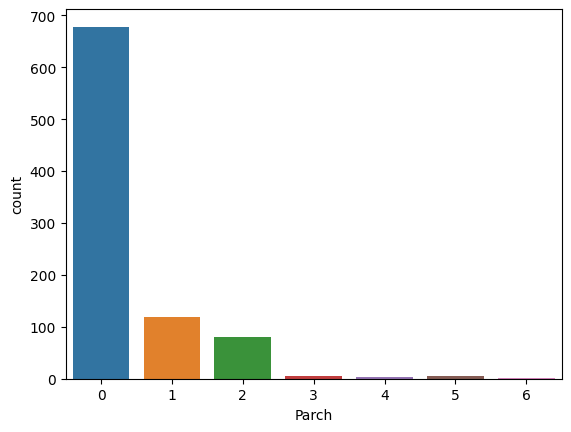

In [46]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(x='Parch',data=df)

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

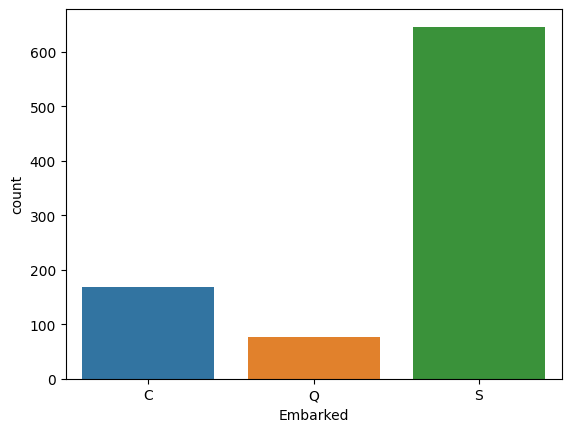

In [47]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(x='Embarked',data=df)

0.45956263424701577
0.9865867453652877


C:\Users\HP\AppData\Local\Temp\ipykernel_10012\747997586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


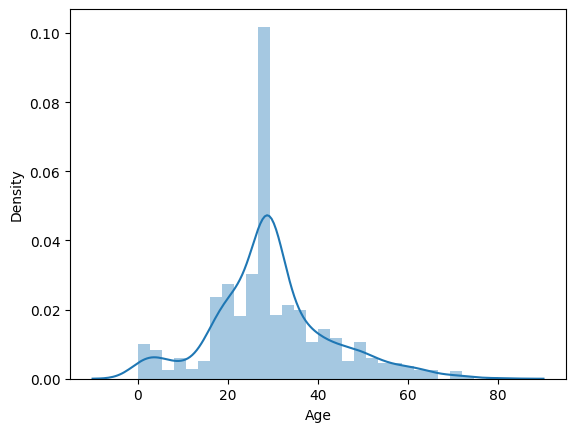

In [48]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

<Axes: >

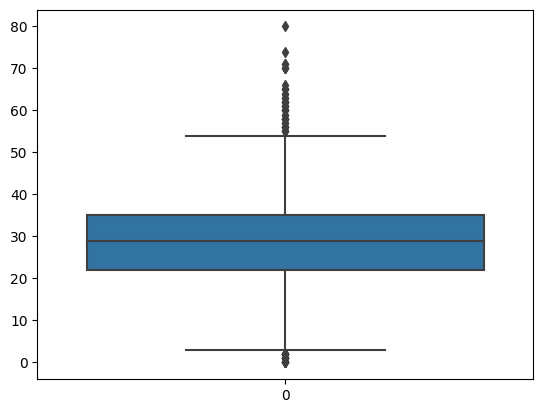

In [49]:
sns.boxplot(df['Age'])

In [51]:
print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
People with age between 0 and 1 7


C:\Users\HP\AppData\Local\Temp\ipykernel_10012\1811918685.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

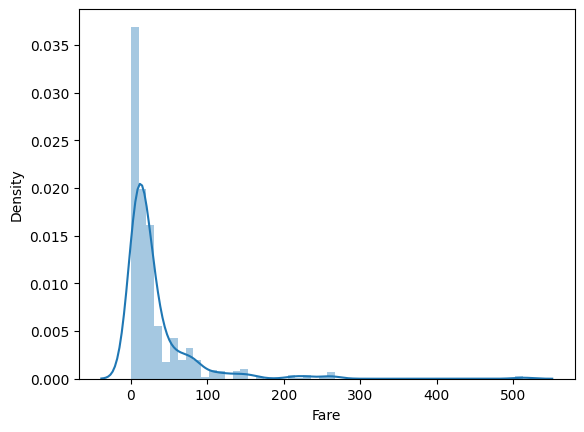

In [52]:
# Fare column

sns.distplot(df['Fare'])

In [53]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<Axes: xlabel='Fare'>

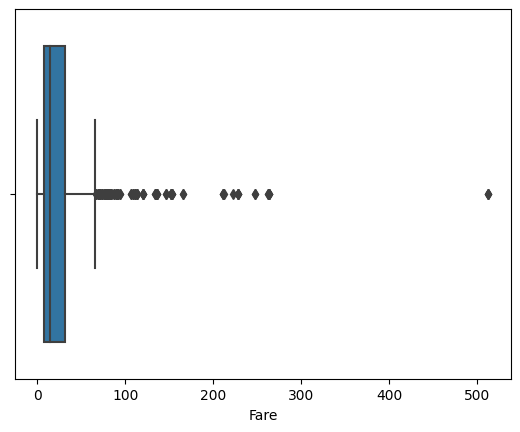

In [55]:
sns.boxplot(x='Fare',data=df)

In [56]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


In [57]:
#Conclusion
#Highly skewed data, a lot of people had cheaper tickets
#Outliers are there in the data

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


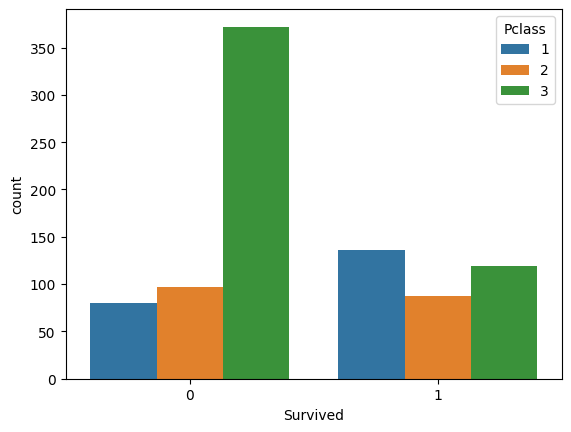

In [59]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(x='Survived', hue='Pclass', data=df)

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


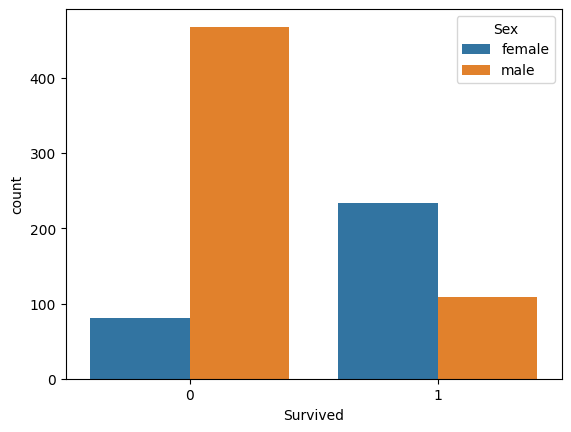

In [60]:
# Survival with Sex

sns.countplot(x='Survived', hue='Sex',data=df)


pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


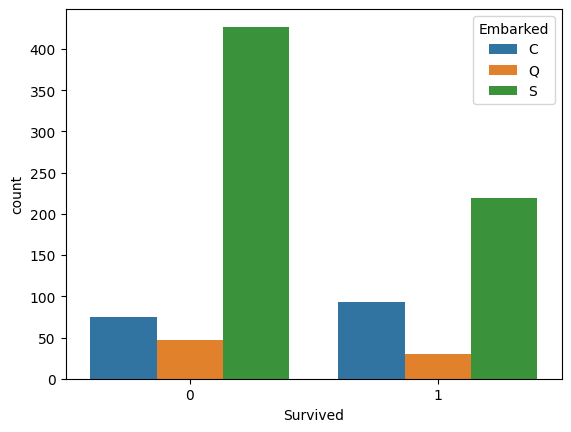

In [61]:
# Survival with Embarked

sns.countplot(x='Survived', hue='Embarked',data=df)

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_10012\4035758269.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10012\4035758269.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

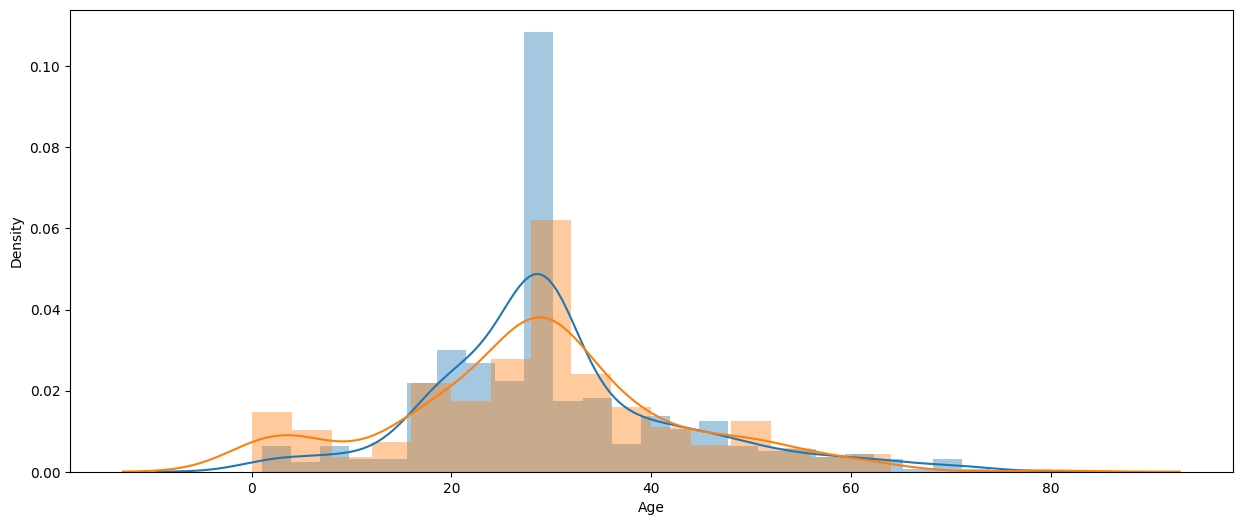

In [64]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\HP\AppData\Local\Temp\ipykernel_10012\1917301903.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10012\1917301903.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

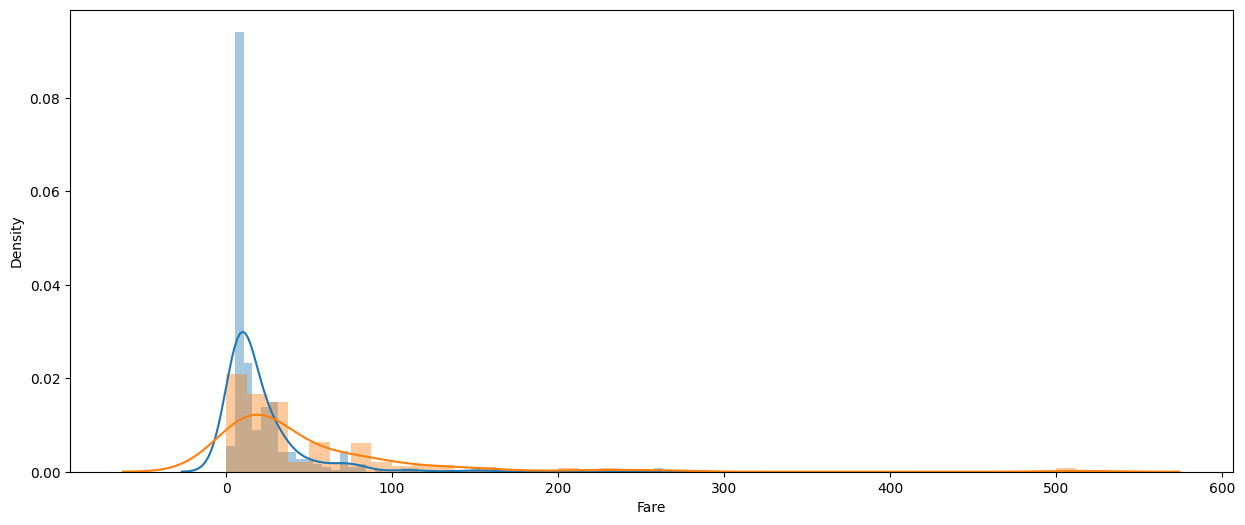

In [65]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

In [ ]:
# Feature Engineering